In [39]:
#K-Naivny Bayes
#V tomto pripade pracujem s modelom Naivny Bayes pre pripad 5 - clennej klasifikacie
#V prvej casti sa mnozina dat delin stratifikovane, no nevyuzivam metodu SMOTE
#Neskor v druhej casti pouzijem metodu SMOTE a opat aplikujem algoritmus Naivny Bayes

In [12]:
#nacitanie kniznic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

# nastavíme zobrazovanie grafov priamo v odstavcoch zápisníka
%matplotlib inline
# inicializujeme knižnicu seaborn
sns.set()
sns.set_style("darkgrid")

In [13]:
#Nacitanie datasetu
data = pd.read_csv("DATA/student_prediction.csv")
#Zobrazenie hlavicky datasetu
data.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [14]:
#Zobrazenie hlavicky datasetu po premazani stlpca STUDNTID
data.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [15]:
#Vymazanie stlpca STUDENTID
data.drop(columns = data.columns[0], axis = 1, inplace= True)

In [16]:
#Zobrazenie rozmeru datasetu
data.shape

(145, 32)

In [17]:
#Funkcia new_grade prevedie 8 - clennu klasifikaciu na 5 - clennu pomocou jednoduchych podmienok
def new_grade(grade):
    if grade == 7:
        return 1
    elif grade == 6:
        return 2
    elif grade == 5:
        return 2
    elif grade == 4:
        return 3
    elif grade == 3:
        return 3
    elif grade == 2:
        return 4
    elif grade == 1:
        return 4
    else:
        return 5

In [18]:
#funkciu new_grade aplikujem na atribut GRADE
#Pridam do datasetu atribut NEW_GRADE
data["NEW_GRADE"] = data["GRADE"].apply(new_grade)
data.head(5000)

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE,NEW_GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,3,2,1,2,1,1,1,1,4
1,2,2,3,3,1,2,2,1,1,1,...,1,3,2,3,2,2,3,1,1,4
2,2,2,2,3,2,2,2,2,4,2,...,1,2,2,1,1,2,2,1,1,4
3,1,1,1,3,1,2,1,2,1,2,...,2,3,2,2,1,3,2,1,1,4
4,2,2,1,3,2,2,1,3,1,4,...,1,2,2,2,1,2,2,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,2,1,2,1,3,3,9,5,2
141,1,1,2,4,2,2,2,1,4,2,...,1,3,2,2,1,5,3,9,5,2
142,1,1,1,4,2,2,2,1,1,1,...,1,3,3,2,1,4,3,9,1,4
143,2,1,2,4,1,1,1,5,2,3,...,1,2,1,2,1,5,3,9,4,3


In [19]:
#Vymazanie atribut GRADE z datasetu 
data = data.drop(['GRADE'], axis = 1)

In [20]:
#Vyvorenie premennej x a y, pricom x su predikujuce atributu a y je predikovany atribut NEW_GRADE
x = data.drop(['NEW_GRADE'], axis = 1)
y = data['NEW_GRADE']

In [21]:
#Vyvorenie premennej X a Y, pricom X su predikujuce atributu a Y je predikovany atribut NEW_GRADE
X = data.drop(['NEW_GRADE'], axis = 1)
Y = data['NEW_GRADE']

In [22]:
#Rozdelenie mnoziny stratifikovane na trenovaciu a testovaciu 
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0, stratify = y)

In [23]:
#Vytvorenie a natrenovanie modelu
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [24]:
#Vytvorenie premenej y_pred, ktora obsahuje predikovane hodnoty atributu NEW_GRADE
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X_test)

In [25]:
#vypis klasifikacneho reportu
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       1.00      0.25      0.40        20
           2       0.11      0.33      0.17         3
           3       0.22      0.33      0.27         6
           4       0.44      0.73      0.55        11
           5       0.33      0.25      0.29         4

    accuracy                           0.39        44
   macro avg       0.42      0.38      0.33        44
weighted avg       0.63      0.39      0.39        44



In [26]:
#Vypis kontingencnej tabulky
table = pd.crosstab( y_test, y_pred)
table

col_0,1,2,3,4,5
NEW_GRADE,,,,,
1,5,0,0,0,0
2,6,1,0,2,0
3,5,0,2,1,1
4,4,1,3,8,2
5,0,1,1,0,1


AUC for Class 1: 0.8307692307692307
AUC for Class 2: 0.5365079365079365
AUC for Class 3: 0.5301587301587302
AUC for Class 4: 0.747863247863248
AUC for Class 5: 0.6341463414634146


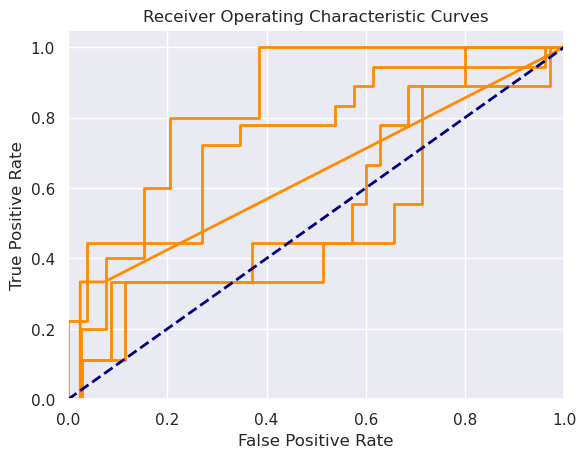

In [27]:
#Graficke zobraznie a zobrazenie hodnot AUC
from sklearn.metrics import roc_curve, auc

y_score = clf.predict_proba(X_test)
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]



fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

Class=3, n=59 (40.690%)
Class=1, n=30 (20.690%)
Class=4, n=8 (5.517%)
Class=2, n=31 (21.379%)
Class=0, n=17 (11.724%)


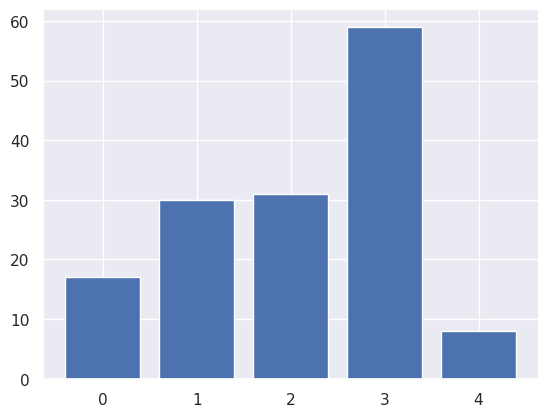

In [28]:
#Tu mozeme vidiet rozdelenie atributu GRADE, ktory je predikovany atribut
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
y = LabelEncoder().fit_transform(y)
# ciselny vypis
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# graf distribucie hodnot atribut NEW_GRADE
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


In [29]:
#V tejto casti uz na dataset aplikujem metodu SMOTE

In [30]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

# nastavíme zobrazovanie grafov priamo v odstavcoch zápisníka
%matplotlib inline
# inicializujeme knižnicu seaborn
sns.set()
sns.set_style("darkgrid")

In [33]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=3, n=59 (20.000%)
Class=1, n=59 (20.000%)
Class=4, n=59 (20.000%)
Class=2, n=59 (20.000%)
Class=0, n=59 (20.000%)


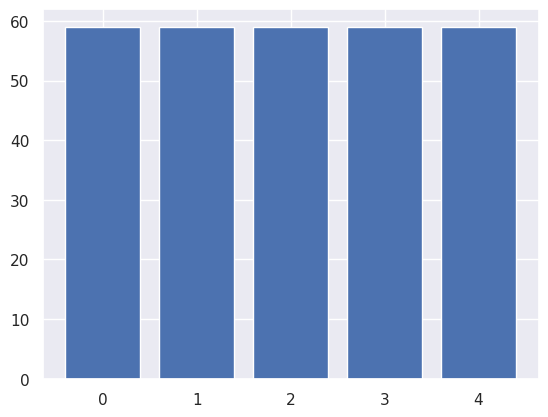

In [34]:
#Pouzitie metody SMOTE, ktora zabezpecila ze vsetky triedy mali rovnake mnozstvo poloziek
y = LabelEncoder().fit_transform(y)
# transformacia datasetu
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)
# ciselny vypis distribucie hodnot atribut NEW_GRADE
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# graf distribucie hodnot atribut NEW_GRADE
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [35]:
#Opat stratifikovane rozdelenie mnoziny na trenovaciu a testovaciu
x_train, x_test, Y_train,Y_test = train_test_split(X,y,test_size = 0.3, random_state = 0, stratify = y)

In [36]:
#Vytvorenie a natrenovanie druheho modelu
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
clf2.fit(x_train, Y_train)

GaussianNB()

In [37]:
##Vytvorenie premenej y_pred2, ktora obsahuje predikovane hodnoty atribut NEW_GRADE
from sklearn.metrics import classification_report, confusion_matrix
y_pred2 = clf2.predict(x_test)

In [38]:
#Vypis klasifikacneho reportu
print(classification_report(y_pred2, Y_test))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62        34
           1       0.33      0.55      0.41        11
           2       0.29      0.42      0.34        12
           3       0.33      0.46      0.39        13
           4       0.94      0.89      0.92        19

    accuracy                           0.56        89
   macro avg       0.56      0.56      0.54        89
weighted avg       0.67      0.56      0.59        89



In [39]:
#Vypis kontingencnej tabulky
table2 = pd.crosstab( Y_test, y_pred2)
table2

col_0,0,1,2,3,4
row_0,,,,,
0,16,0,0,2,0
1,9,6,0,3,0
2,6,3,5,2,1
3,3,2,6,6,1
4,0,0,1,0,17
